In [15]:
import numpy as np
import cv2 as cv
import scipy.ndimage as scidi
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import spatial
from sklearn import neighbors as KNN
from sklearn import metrics as MLMets

np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

Sigma = 3
L1 = 3231880.0
L2 = 22126.2384710344
Cos = 0.17126797050809905
Sigma = 5
L1 = 3103182.0
L2 = 21464.956704445576
Cos = 0.172816143243546
Sigma = 7
L1 = 3020662.0
L2 = 20960.37410539354
Cos = 0.15860151835045566
Sigma = 9
L1 = 2984154.0
L2 = 20712.60080370682
Cos = 0.16232832076413173
Sigma = 11
L1 = 2961957.0
L2 = 20585.185845476703
Cos = 0.18318817581912006
Sigma = 13
L1 = 2961707.0
L2 = 20634.128667398276
Cos = 0.17637805497739278
Sigma = 15
L1 = 2940632.0
L2 = 20537.67203574693
Cos = 0.17857677977838082
Sigma = 17
L1 = 2917114.0
L2 = 20384.452316807237
Cos = 0.18685414056623362
Sigma = 19
L1 = 2894583.0
L2 = 20218.491462363076
Cos = 0.20713115166454243
Sigma = 21
L1 = 2874365.0
L2 = 20107.990051816032
Cos = 0.22602807943610315
Sigma = 23
L1 = 2848560.0
L2 = 19967.669083976038
Cos = 0.22414349349755858
Sigma = 25
L1 = 2819892.0
L2 = 19803.819697885265
Cos = 0.2708461308493533


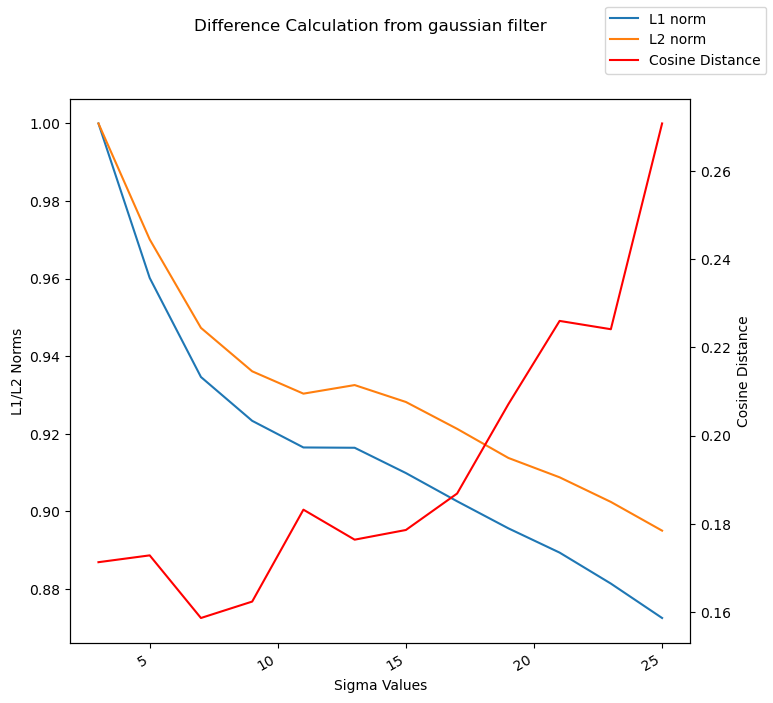

In [16]:
#Problem 2
# Write a code that takes an image, applies gaussian blur, and examines the impact of different gaussian blur on
# different Distance metrics
with Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg") as pic:
    pic = pic.resize((150,150))
    pic = ImageOps.grayscale(pic)
    S1 = scidi.gaussian_filter(np.uint8(pic),sigma = 3)
    Image.fromarray(S1).save("HW4Q2S3.jpg")
    S2 = scidi.gaussian_filter(np.uint8(pic),sigma = 7)
    Image.fromarray(S2).save("HW4Q2S7.jpg")
    S3 = scidi.gaussian_filter(np.uint8(pic),sigma = 11)
    Image.fromarray(S3).save("HW4Q2S11.jpg")

    X = []
    L1s = []
    L2s = []
    LCoss = []

    for i in range(3,27,2):
        S = scidi.gaussian_filter(np.uint8(pic),sigma = i)

        L1 = np.linalg.norm((S-pic).flatten(),ord = 1)
        L2 =  np.linalg.norm(S-pic,ord = 2)
        LCos = spatial.distance.cosine( np.asarray(S).flatten(),np.asarray(pic).flatten())
        print("Sigma = %s" %i)
        print("L1 = %s" %L1)
        print("L2 = %s" %L2)
        print("Cos = %s" %LCos)


        X.append(i)
        L1s.append(L1)
        L2s.append(L2)
        LCoss.append(LCos)

    L1s /= max(L1s)
    L2s /= max(L2s)


    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.plot(X, L1s,label = "L1 norm" )
    ax1.plot(X, L2s, label = "L2 norm")
    ax2.plot(X, LCoss, label = "Cosine Distance", color = 'red')

    ax1.set_xlabel("Sigma Values")
    ax1.set_ylabel("L1/L2 Norms")
    ax1.tick_params(axis="y")

    ax2.set_ylabel("Cosine Distance")
    ax2.tick_params(axis="y")

    fig.suptitle("Difference Calculation from gaussian filter")
    fig.legend()
    fig.autofmt_xdate()
    fig.savefig('HW4Q2.png')



In [17]:
#3 asks us to create a random noise photo


def G(X,d):
    N = abs(np.random.rand(X.shape[0],X.shape[1]))
    alpha = d/np.sum(N)
    return X+alpha*N


TestArray = np.asarray([[2,4],[1,3]])
NoiseAdded = G(TestArray,4)
np.linalg.norm((TestArray-NoiseAdded).flatten(),ord = 1)

pic = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
pic = pic.resize((150,150))
pic = ImageOps.grayscale(pic)
pic.save("HW4Q3a.jpg")
S1 = G((np.asarray(pic)),10**4)
Image.fromarray(np.uint8(S1)).save("HW4Q3b.jpg")
S2 = G(np.asarray(pic),10**6)
Image.fromarray(np.uint8(S2)).save("HW4Q3c.jpg")
S3 = G(np.asarray(pic),10**7)
Image.fromarray(np.uint8(S3)).save("HW4Q3d.jpg")

print(np.linalg.norm((S1-pic).flatten(),ord = 1))
print(np.linalg.norm((S2-pic).flatten(),ord = 1))
print(np.linalg.norm((S3-pic).flatten(),ord = 1))




10000.0
1000000.0
10000000.000000002


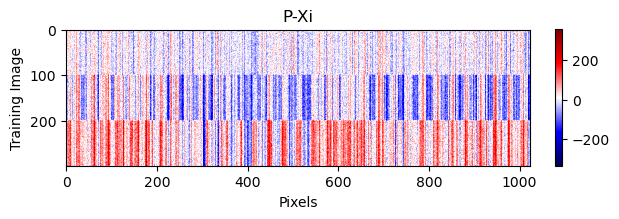

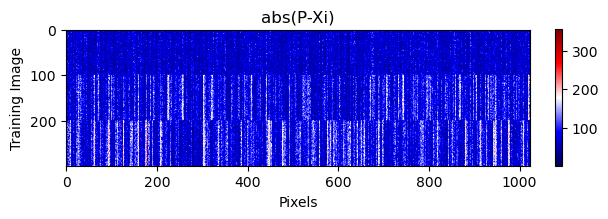

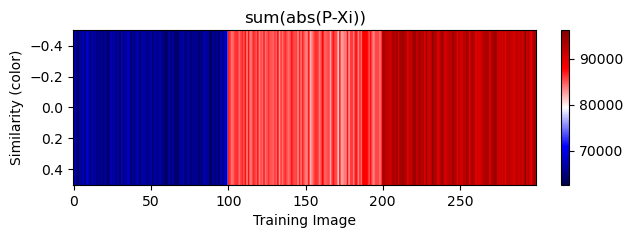

In [25]:
Me = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")
Me = Me.resize((32,32))
Me = ImageOps.grayscale(Me)
Me = np.uint8(Me)
dog = dog.resize((32,32))
dog = ImageOps.grayscale(dog)
dog = np.uint8(dog)
cat = cat.resize((32,32))
cat = ImageOps.grayscale(cat)
cat = np.uint8(cat)

TrainingDataset= []
TrainingLabels = []


Output1 = np.zeros((300,1024))
Output2 = np.zeros((300,1024))
Output3 = np.zeros((1,300))

P = G(np.asarray(Me),10**5)

for i in range(100):
    j = i+100
    k = i+200

    M = G(np.asarray(Me),10**5)
    D = G(np.asarray(dog),10**5)
    C = G(np.asarray(cat),10**5)

    TrainingDataset.append(M.flatten())
    TrainingLabels.append(1)
    TrainingDataset.append(D.flatten())
    TrainingLabels.append(2)
    TrainingDataset.append(C.flatten())
    TrainingLabels.append(3)

    Output1[i,:] = P.flatten()-M.flatten()
    Output1[j,:] = P.flatten()-D.flatten()
    Output1[k,:] = P.flatten()-C.flatten()

    Output2[i,:] = np.abs(Output1[i,:])
    Output2[j,:] = np.abs(Output1[j,:])
    Output2[k,:] = np.abs(Output1[k,:])

    Output3[0,i] = sum(Output2[i,:])
    Output3[0,j] = sum(Output2[j,:])
    Output3[0,k] = sum(Output2[k,:])

im = plt.imshow(Output1,cmap = 'seismic')
plt.title("P-Xi")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5aplot.png")
plt.show()

im = plt.imshow(Output2,cmap = 'seismic')
plt.title("abs(P-Xi)")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5bplot.png")
plt.show()

im = plt.imshow(Output3,cmap = 'seismic',aspect = 100)
plt.title("sum(abs(P-Xi))")
plt.xlabel("Training Image")
plt.ylabel("Similarity (color)")
plt.colorbar(fraction=0.047*100/300)
plt.savefig("5cplot.png")
plt.show()






In [28]:
Me = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")
Me = Me.resize((32,32))
Me = ImageOps.grayscale(Me)
Me = np.uint8(Me)
dog = dog.resize((32,32))
dog = ImageOps.grayscale(dog)
dog = np.uint8(dog)
cat = cat.resize((32,32))
cat = ImageOps.grayscale(cat)
cat = np.uint8(cat)

TestSet = []
TestLabel = []
ConfusionMatrix = np.zeros((3,3))

for k in range(5,8,1):
    for i in range(10):
        TestSet.append(G(Me,10**k).flatten())
        TestLabel.append(1)
        TestSet.append(G(dog,10**k).flatten())
        TestLabel.append(2)
        TestSet.append(G(cat,10**k).flatten())
        TestLabel.append(3)


TrainingDataset = np.asarray(TrainingDataset)
TestSet = np.asarray(TestSet)



KNNClassifier = KNN.KNeighborsClassifier(n_neighbors= 3,weights='distance',metric = 'l1')
KNNClassifier.fit(TrainingDataset,TrainingLabels)
Predictions = KNNClassifier.predict(TestSet)
ConfusionMatrix = MLMets.confusion_matrix(TestLabel,Predictions)
Accuracy = MLMets.accuracy_score(TestLabel,Predictions)
print(ConfusionMatrix)
print(Accuracy)




[[10 20  0]
 [ 0 30  0]
 [ 0 20 10]]
0.5555555555555556


[[0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]]


Text(0.5, 1.0, 'Accuracy as a function of random noise added')

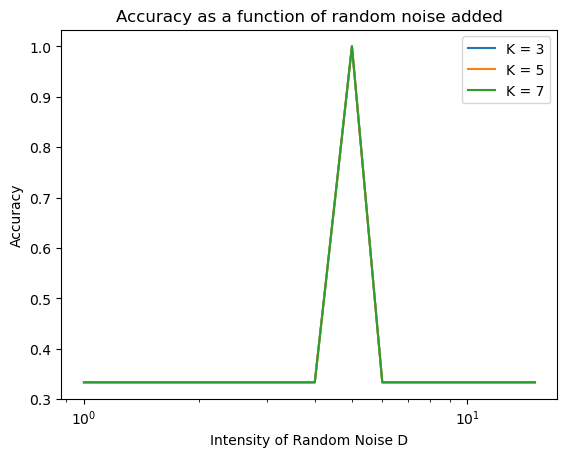

In [36]:
#Question 7: 

AccuracyMatrix = np.zeros((3,15))
BIGD = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for yindex,d in enumerate(BIGD):
    for xindex,k in enumerate([3,5,7]):
        TempTestSet = []
        TempTestLabels = []
        for i in range(50): #Generate Testing Dataset
            TempTestSet.append(G(Me,10**d).flatten())
            TempTestLabels.append(1)
            TempTestSet.append(G(dog,10**d).flatten())
            TempTestLabels.append(2)
            TempTestSet.append(G(cat,10**d).flatten())
            TempTestLabels.append(3)


        ExperimentalClassifier = KNN.KNeighborsClassifier(n_neighbors= k,weights='distance',metric = 'l1')
        ExperimentalClassifier.fit(TrainingDataset,TrainingLabels)
        ExperimentalPredictions = ExperimentalClassifier.predict(TempTestSet)
        ExperimentalAccuracy = MLMets.accuracy_score(TempTestLabels,ExperimentalPredictions)
        AccuracyMatrix[xindex,yindex] = ExperimentalAccuracy

print(AccuracyMatrix)
plt.plot(BIGD,AccuracyMatrix[0,:],label = "K = 3")
plt.plot(BIGD,AccuracyMatrix[1,:],label = "K = 5")
plt.plot(BIGD,AccuracyMatrix[2,:],label = "K = 7")
plt.legend()
plt.xlabel("Intensity of Random Noise D")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("Accuracy as a function of random noise added")
plt.savefig("HW4Q7.png")
plt.show()







